<a href="https://colab.research.google.com/github/Gracia123/Sales-Prediction/blob/main/CS680_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
%ls

Saving test_inputs.csv to test_inputs.csv
Saving test_labels.csv to test_labels.csv
Saving train_inputs.csv to train_inputs.csv
Saving train_labels.csv to train_labels.csv
sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_knn_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

In [ ]:
def predict_knn(x, inputs, labels, k_neighbours):
  #to predict the euclidean distances between the inputs and x and store in ascending order
  #distances = np.empty(len(labels))
  distances = []
  predicted_label = 0
  #distances = np.square(inputs, x)
  #distances = np.sqrt(distances)
  distances = np.linalg.norm(inputs-x,axis=1)
  #Storing distances and their indices
  distance_index = np.argsort(distances,0) 
  distances = np.sort(distances,0)
  #To return predicted label based on distance and distance_index
  predictions = []
  labels = labels.flatten()
  #for i in range(len(k_neighbours)):
  #  response = k_neighbours[i][0]
  #  if response in labels:
  #    labels[response]+=1
  # else:
  #    labels[response]=1

  for i in range(k_neighbours):         
    #Storing index of distance between point and k_neighbours and storing in prediction
    position = distance_index[i]
    predictions.append(labels[position])
  #predicted_label = sorted(labels.items(), key = lambda x:x[1], reverse=True)
  predicted_label = (max(predictions,key=predictions.count)) 
  return predicted_label

In [ ]:
def eval_knn(inputs, labels, train_inputs, train_labels, k_neighbours):
  #predicted = np.empty(len(inputs))
  predictions = []
  labels = labels.flatten()
  #accuracy = 0
  #Finding predicted labels 
  for i in range(len(inputs)):
    predictions.append(predict_knn(inputs[i],train_inputs,train_labels,k_neighbours))
  #Checking when predicted label == labels

  #for i in range(len(inputs)):
  #  correct = 0
  #  predictions = predict_knn(inputs[i], train_inputs, train_labels, k_neighbours)
  #  if predictions == labels[i]:
  #    correct = correct + 1
  #accuracy = np.round((correct/len(inputs))*100, 4)
  
  element = np.equal(labels, predictions)
  accuracy = np.mean(element)
  accuracy = np.round(accuracy*100, 4)
  return accuracy


In [ ]:
def cross_validation_knn(k_folds, hyperparameters, inputs, labels):
  inputs_split = np.split(inputs, k_folds)
  #inputs_split = np.array_split(inputs, k_folds) 
  labels_split = np.split(labels, k_folds)
  #labels_split = np.array_split(labels, k_folds)
  #Measuring accuracy
  accuracy = []
  for k in hyperparameters:
    k_accuracies=[]
    for i in range(k_folds):
      #Splitting inputs to training and testing datasets // k_fold_size = 100
      train_inputs, test_inputs = np.concatenate(inputs_split[:i] + inputs_split[i+1:]), inputs_split[i]
      train_labels, test_labels = np.concatenate(labels_split[:i] + labels_split[i+1:]), labels_split[i]
      k_accuracies.append(eval_knn(test_inputs, test_labels, train_inputs, train_labels, k))
      #np.append(accuracy_k, eval_knn(train_inputs, train_labels, train_inputs, train_labels,i))
    accuracy.append(np.mean(np.array(k_accuracies)))
  #Returning accuracy, best k, array of all accuracies  
  best_accuracy = max(accuracy)
  best_accuracy = np.round(best_accuracy, 4)
  #best_hyperparam = accuracy.index(max(accuracy))
  element = np.where(accuracy == best_accuracy)
  best_hyperparam = (element[0][0] + 1)
  accuracies = accuracy
  
  return best_hyperparam, best_accuracy, accuracies
 

In [ ]:
def plot_knn_accuracies(accuracies,hyperparams):
  plt.plot(hyperparams,accuracies)
  plt.ylabel('accuracy')
  plt.xlabel('k neighbours')
  plt.show()  

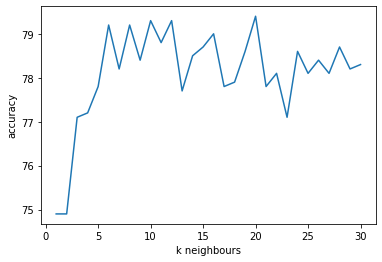

best # of neighbours k: 20
best cross validation accuracy: 79.4
test accuracy: 77.2727


In [ ]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_knn_data()

# number of neighbours to be evaluated by cross validation
hyperparams = range(1,31)
k_folds = 10
best_k_neighbours, best_accuracy, accuracies = cross_validation_knn(k_folds, hyperparams, train_inputs, train_labels)

# plot results
plot_knn_accuracies(accuracies, hyperparams)
print('best # of neighbours k: ' + str(best_k_neighbours))
print('best cross validation accuracy: ' + str(best_accuracy))

# evaluate with best # of neighbours
accuracy = eval_knn(test_inputs, test_labels, train_inputs, train_labels, best_k_neighbours)
print('test accuracy: '+ str (accuracy))